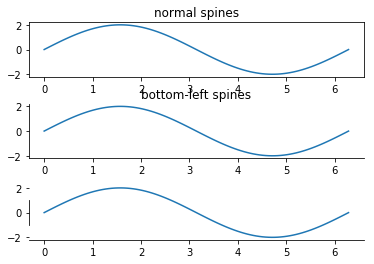

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi, 100)
y = 2 * np.sin(x)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)

ax0.plot(x, y)
ax0.set_title('normal spines')

ax1.plot(x, y)
ax1.set_title('bottom-left spines')

# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

ax2.plot(x, y)

# Only draw spine between the y-ticks
ax2.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.5)
plt.show()

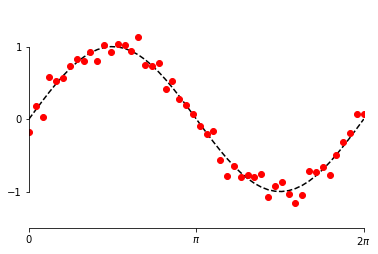

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = y + 0.1 * np.random.normal(size=x.shape)

fig, ax = plt.subplots()
ax.plot(x, y, 'k--')
ax.plot(x, y2, 'ro')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

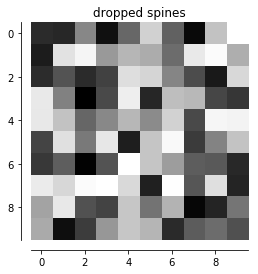

In [3]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

image = np.random.uniform(size=(10, 10))
ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('dropped spines')

# Move left and bottom spines outward by 10 points
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

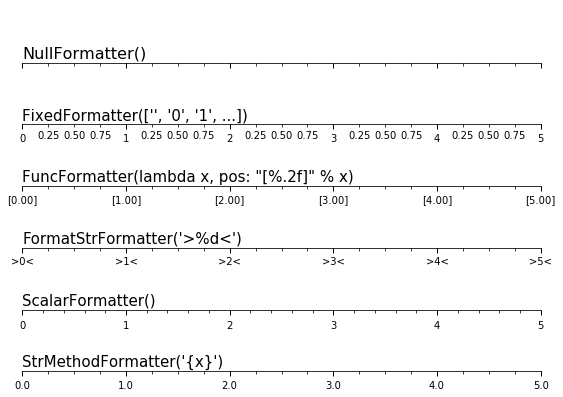

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 5))
n = 6

# Null formatter
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.text(0.0, 0.1, "NullFormatter()", fontsize=16, transform=ax.transAxes)

# Fixed formatter
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
majors = ["", "0", "1", "2", "3", "4", "5"]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
minors = [""] + ["%.2f" % (x-int(x)) if (x-int(x))
                 else "" for x in np.arange(0, 5, 0.25)]
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
ax.text(0.0, 0.1, "FixedFormatter(['', '0', '1', ...])",
        fontsize=15, transform=ax.transAxes)


# Func formatter
def major_formatter(x, pos):
    return "[%.2f]" % x


ax = plt.subplot(n, 1, 3)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(major_formatter))
ax.text(0.0, 0.1, 'FuncFormatter(lambda x, pos: "[%.2f]" % x)',
        fontsize=15, transform=ax.transAxes)


# FormatStr formatter
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
ax.text(0.0, 0.1, "FormatStrFormatter('>%d<')",
        fontsize=15, transform=ax.transAxes)

# Scalar formatter
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.text(0.0, 0.1, "ScalarFormatter()", fontsize=15, transform=ax.transAxes)

# StrMethod formatter
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

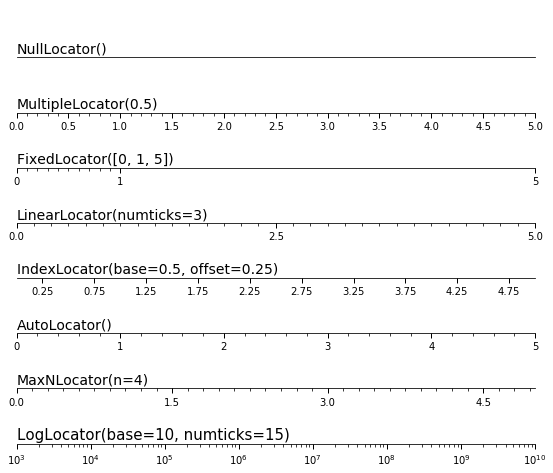

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='White')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

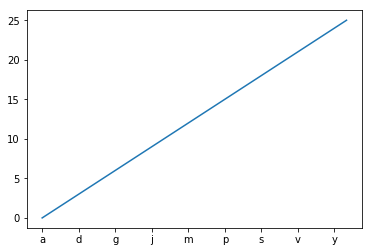

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
fig = plt.figure()
ax = fig.add_subplot(111)
xs = range(26)
ys = range(26)
labels = list('abcdefghijklmnopqrstuvwxyz')


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''


ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(xs, ys)
plt.show()

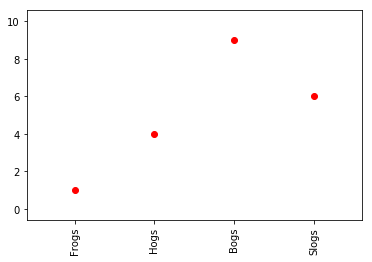

In [7]:
import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()